In [46]:
import pandas as pd
from os import path
import src.utils.prep as prep 

df = prep.main()


In [40]:
# define colors
import matplotlib.colors as mcolors

abc_procedure_names = {
    1: "open",
    26: "framework assignment",
    4: "negotiated",
    23: "assignment"
}

procedure_color_map = dict()
for p, c in zip(abc_procedure_names, mcolors.TABLEAU_COLORS):
    procedure_color_map[p] = c



df["proc_color"] = df["id_award_procedure"].map(procedure_color_map)

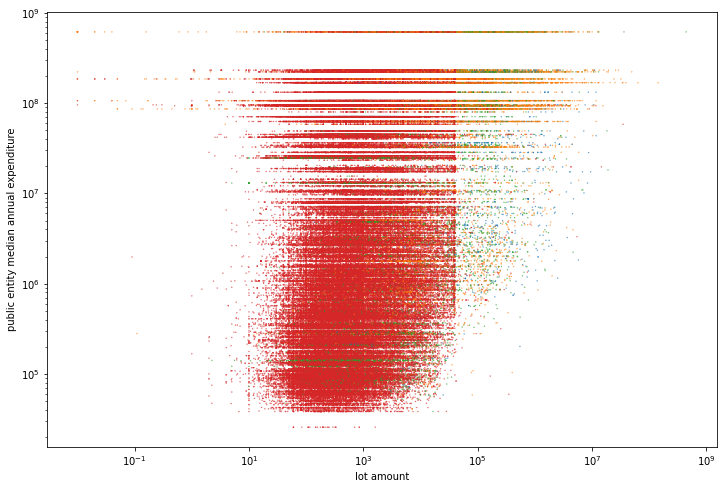

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
s = plt.scatter(
    df["amount"], df["pa_med_ann_expenditure"], c=df["proc_color"],
    s=0.1, alpha=1
)
plt.xlabel("lot amount")
plt.ylabel("public entity median annual expenditure")
plt.loglog()
plt.show()

In [22]:
df.columns

Index(['id_lotto', 'id_pa', 'object', 'id_award_procedure', 'amount',
       'start_date', 'data_fine', 'id_lsf', 'id_forma_giuridica',
       'uber_forma_giuridica', 'cpv', 'id_be', 'n_winners',
       'pa_med_ann_expenditure', 'be_med_ann_revenue', 'pa_med_ann_contr',
       'be_med_ann_contr', 'pa_med_ann_n_contr', 'be_med_ann_n_contr',
       'duration', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'sinMonth', 'cosMonth', 'daysSinceBaseDate', 'min_nlots_id_be',
       'min_nlots_id_pa', 'outlier', 'proc_color'],
      dtype='object')

In [83]:
abc_cpv_names = {
    33: "medical instruments",
    45: "works",
    85: "healthcare services",
    79: "consulting services "
}
abc_procedure_names = {
    1: "open",
    26: "framework assignment",
    4: "negotiated",
    23: "assigment"
}

procedure_mask = df["id_award_procedure"] == 1
for item in abc_procedure_names:
    procedure_mask += df["id_award_procedure"] == item

cpv_mask = df["cpv"] == 33
for item in abc_cpv_names:
    cpv_mask += df["cpv"] == item

colors = dict()
abc_names = {
    33: "medical instruments",
    45: "works",
    85: "healthcare services",
    79: "consulting services ",
    1: "open",
    26: "framework assignment",
    4: "negotiated",
    23: "assigment"
}
for i, item in enumerate(abc_names):
    colors[item] = i
colors

{33: 0, 45: 1, 85: 2, 79: 3, 1: 4, 26: 5, 4: 6, 23: 7}

In [98]:
procedure_mask = df["id_award_procedure"] == 1
for item in abc_procedure_names:
    procedure_mask += df["id_award_procedure"] == item

cpv_mask = df["cpv"] == 33
for item in abc_cpv_names:
    cpv_mask += df["cpv"] == item

abc_names = {
    33: "medical instruments",
    45: "works",
    85: "healthcare services",
    79: "consulting services ",
    1: "open",
    26: "framework assignment",
    4: "negotiated",
    23: "assigment"
}

id_to_color = dict()
color_to_id = dict()
for i, item in enumerate(abc_names):
    id_to_color[item] = i
    color_to_id[i] = item

def _forward(s: pd.Series) -> pd.Series:
    return s.map(id_to_color)


def _inverse(s: pd.Series) -> pd.Series:
    return s.map(color_to_id)
    
norm = mpl.colors.FuncNorm((_forward, _inverse), vmax=1, vmin=0)

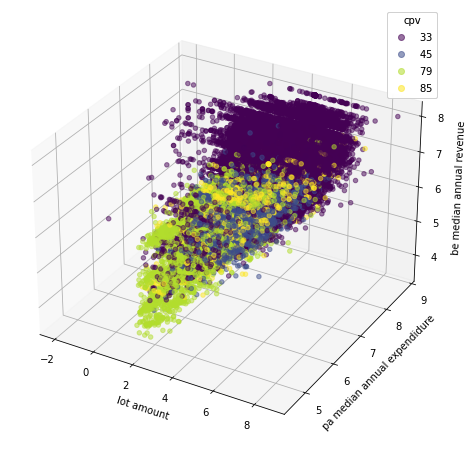

In [101]:
import numpy as np
import matplotlib as mpl
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
data = df[cpv_mask]

x = np.log10(data["amount"])
y = np.log10(data["pa_med_ann_expenditure"])
z = np.log10(data["be_med_ann_revenue"])
s = ax.scatter(x, y, z, c=data["cpv"], alpha=.5)
legend = ax.legend(*s.legend_elements(), title="cpv")
ax.add_artist(legend) 
ax.set_xlabel("lot amount")
ax.set_ylabel("pa median annual expendidure")
ax.set_zlabel("be median annual revenue")
plt.show()


TypeError: __call__() takes 1 positional argument but 2 were given

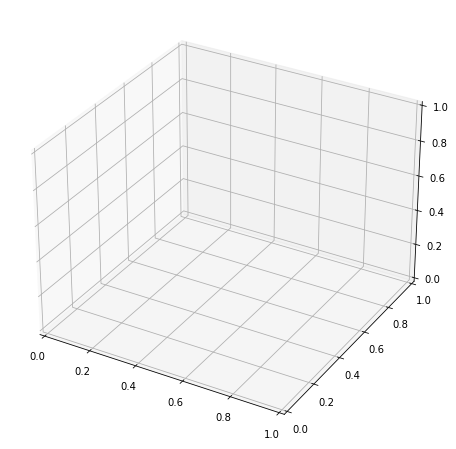

In [113]:
import numpy as np
import matplotlib as mpl
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
data = df[procedure_mask]
x = np.log10(data["amount"])
y = np.log10(data["pa_med_ann_expenditure"])
z = np.log10(data["be_med_ann_revenue"])
s = ax.scatter(x, y, z, c=data["id_award_procedure"], alpha=.5, cmap=mpl.colormaps("plasma"))
legend = ax.legend(*s.legend_elements(), title="procedure id")
ax.add_artist(legend) 
ax.set_xlabel("lot amount")
ax.set_ylabel("pa median annual expendidure")
ax.set_zlabel("be median annual revenue")
plt.show()

In [114]:
import pandas as pd
from os import path
import src.utils.prep as prep 

df = prep.main()

In [116]:
df.columns

Index(['id_lotto', 'id_pa', 'object', 'id_award_procedure', 'amount',
       'start_date', 'data_fine', 'id_lsf', 'id_forma_giuridica',
       'uber_forma_giuridica', 'cpv', 'id_be', 'n_winners',
       'pa_med_ann_expenditure', 'be_med_ann_revenue', 'pa_med_ann_contr',
       'be_med_ann_contr', 'pa_med_ann_n_contr', 'be_med_ann_n_contr',
       'duration', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'sinMonth', 'cosMonth', 'daysSinceBaseDate', 'min_nlots_id_be',
       'min_nlots_id_pa', 'outlier'],
      dtype='object')

In [4]:
import src.utils.prep as prep 
df = prep.load_dataset()
df = prep.split_sum_totals(df)
# remove the resulting duplicates
df = df[~df.duplicated()]
df = prep.feature_extraction(df)

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
df = prep.main()
t = pd.concat([df.groupby("cpv")["amount"].sum().sort_values(ascending=False), df.groupby("id_scelta_contraente").size().rename("lot_count")], axis=1)
data = (t["amount"]/ t["lot_count"]).sort_values(ascending=False)

coords = range(len(data))
height = data.values

plt.figure(figsize=(16, 8))
plt.bar(coords, t["amount"], tick_label=data.index)

KeyError: 'Column not found: importo'

In [23]:
pd.read_csv("synData6July/tipi_procedure.csv")

,id_scelta_contraente,procedura,tipo_procedura
0,23,AFFIDAMENTO DIRETTO,affidamento
1,8,AFFIDAMENTO IN ECONOMIA - COTTIMO FIDUCIARIO,affidamento
2,17,AFFIDAMENTO DIRETTO EX ART. 5 DELLA LEGGE 381/91,affidamento
3,24,AFFIDAMENTO DIRETTO A SOCIETA' IN HOUSE,affidamento
4,25,AFFIDAMENTO DIRETTO A SOCIETA' RAGGRUPPATE/CON...,affidamento
5,31,AFFIDAMENTO DIRETTO PER VARIANTE SUPERIORE AL ...,affidamento
6,32,AFFIDAMENTO RISERVATO,affidamento
7,36,AFFIDAMENTO DIRETTO PER LAVORI SERVIZI O FORNI...,affidamento
8,4,PROCEDURA NEGOZIATA SENZA PREVIA PUBBLICAZIONE,negoziata
9,6,PROCEDURA NEGOZIATA SENZA PREVIA INDIZIONE DI ...,negoziata


Text(0.5, 1.0, 'negotiated procedure lots, Veneto, 2016-2018')

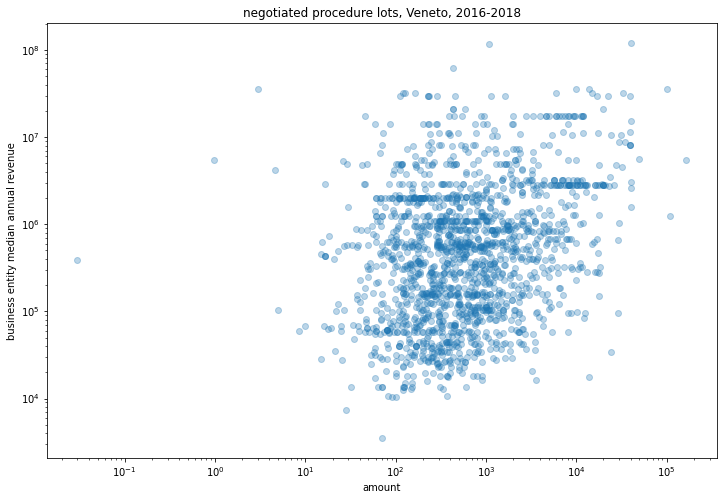

In [127]:
import matplotlib.pyplot as plt
data = df[df["duration"] == 4]
plt.figure(figsize=(12, 8))
plt.scatter(data["amount"], data["be_med_ann_revenue"], alpha=.3)
plt.loglog()
plt.xlabel("amount")
plt.ylabel("business entity median annual revenue")
plt.title("negotiated procedure lots, Veneto, 2016-2018")


In [ ]:
import pandas as pd
from os import path
import src.utils.prep as prep 
import matplotlib.pyplot as plt
df = prep.main()

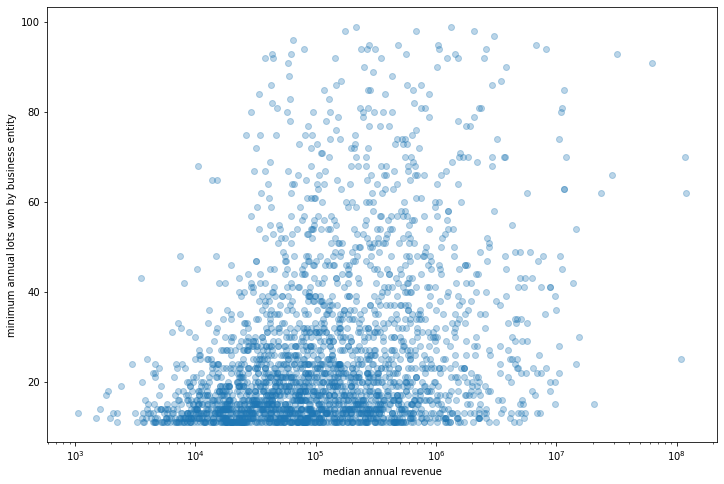

In [6]:
t = df[["be_med_ann_revenue", "min_nlots_id_be"]]
t = t[~t.duplicated()]
t = t[t["min_nlots_id_be"] > 10]
t =  t[t["min_nlots_id_be"] < 100]

plt.figure(figsize=(12, 8))
plt.scatter(t["be_med_ann_revenue"], t["min_nlots_id_be"], alpha=.3)
plt.ylabel("minimum annual lots won by business entity")
plt.xlabel("median annual revenue")
plt.xscale("log")

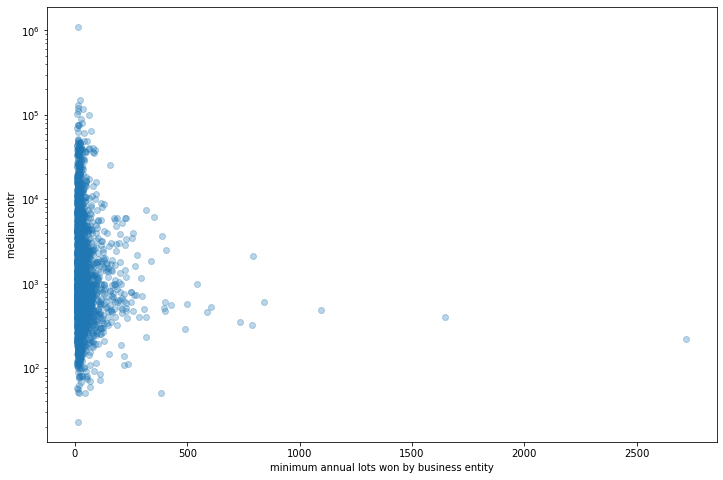

In [15]:

t = df[["be_med_ann_contr", "min_nlots_id_be"]]
t = t[~t.duplicated()]
t = t[t["min_nlots_id_be"] > 10]
plt.figure(figsize=(12, 8))
plt.scatter(t["min_nlots_id_be"], t["be_med_ann_contr"], alpha=.3)
plt.xlabel("minimum annual lots won by business entity")
plt.ylabel("median annual contr")
plt.yscale("log")

In [27]:
import numpy as np

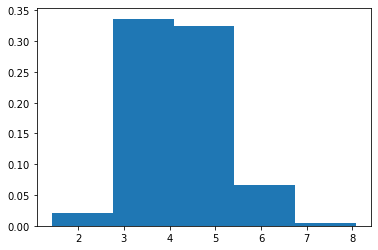

In [42]:
t = df[["be_med_ann_revenue", "min_nlots_id_be"]]
t = t[~t.duplicated()]
t = t[t["min_nlots_id_be"] < 500]
# t = t[t["min_nlots_id_be"] > 10]
x = np.log10(t["be_med_ann_revenue"])
plt.hist(x, bins=5, density=True)
# plt.xticks()
plt.show()

In [48]:
t = df[["be_med_ann_revenue", "min_nlots_id_be"]]
t = t[~t.duplicated()]
t["magnitude"] = np.floor(np.log10(t["be_med_ann_revenue"])).astype("int")

In [152]:
t

,be_med_ann_revenue,min_nlots_id_be,magnitude
0,1.074530e+05,17.0,5.0
1,1.259920e+05,122.0,5.0
2,2.002261e+06,2720.0,6.0
3,2.561000e+03,6.0,3.0
4,2.462785e+05,53.0,5.0
...,...,...,...
741868,1.164800e+03,3.0,3.0
741873,1.194800e+03,3.0,3.0
743636,6.210000e+03,2.0,3.0
746874,4.153000e+03,2.0,3.0


(8, 24)


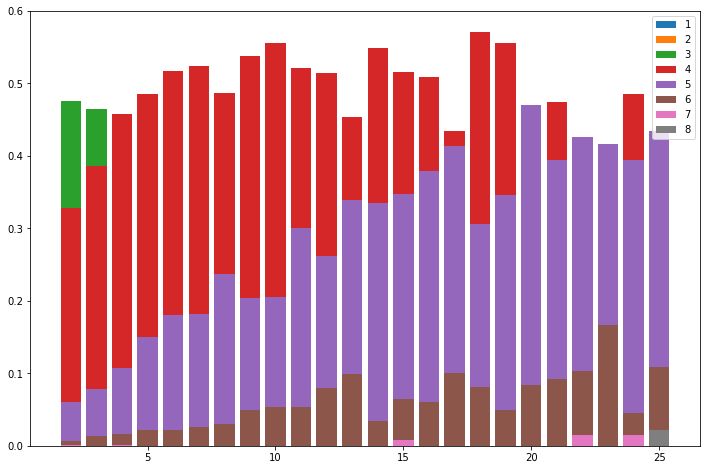

In [177]:
N = 26
M = len(set(t["magnitude"]))
data = pd.DataFrame.from_dict({1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0}, "index")
for n in range(2, N):
    tab = t[t["min_nlots_id_be"] == n]
    tab = tab.groupby("magnitude").size().rename(n)
    data = pd.concat([data, tab], axis=1)
data = data.drop(columns=[0])
data = np.nan_to_num(np.array(data))
data = data / np.sum(data, axis=0)

fig, ax = plt.subplots(figsize=(12, 8))
labels = list(range(2, N))
print(data.shape)
for i in range(data.shape[0]):
    ax.bar(labels, data[i, :], label=i+1)
plt.legend()
plt.show()

In [55]:
df.columns

Index(['id_lotto', 'id_pa', 'object', 'id_award_procedure', 'amount',
       'start_date', 'data_fine', 'id_lsf', 'id_forma_giuridica',
       'uber_forma_giuridica', 'cpv', 'id_be', 'n_winners',
       'pa_med_ann_expenditure', 'be_med_ann_revenue', 'pa_med_ann_contr',
       'be_med_ann_contr', 'pa_med_ann_n_contr', 'be_med_ann_n_contr',
       'duration', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'sinMonth', 'cosMonth', 'daysSinceBaseDate', 'min_nlots_id_be',
       'min_nlots_id_pa', 'outlier'],
      dtype='object')

In [145]:
import plotly.express as px


In [157]:
N = 26
M = len(set(t["magnitude"]))
data = pd.DataFrame.from_dict({1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0}, "index")
for n in range(2, N):
    tab = t[t["min_nlots_id_be"] == n]
    tab = tab.groupby("magnitude").size().rename(n)
    data = pd.concat([data, tab], axis=1)
data = data.drop(columns=[0])

In [159]:
data = data.transpose()

In [165]:
data = data / data.sum(axis=0)

In [168]:
data["N"] = data.index

In [176]:
px.bar(data, x="N", y=[1, 2, 3, 4, 5,6, 7, 8])

In [150]:
long_df = px.data.medals_long()

fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input")
fig.show()

In [174]:
import plotly.express as px

wide_df = px.data.medals_wide()
print(wide_df)

fig = px.bar(wide_df, x="nation", y=["gold", "silver", "bronze"], title="Wide-Form Input")
fig.show()

        nation  gold  silver  bronze
0  South Korea    24      13      11
1        China    10      15       8
2       Canada     9      12      12


In [178]:
df = prep.main()


/var/folders/yj/96_1_7qn6ml45v0p1z0ns7180000gn/T/ipykernel_60314/277393216.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



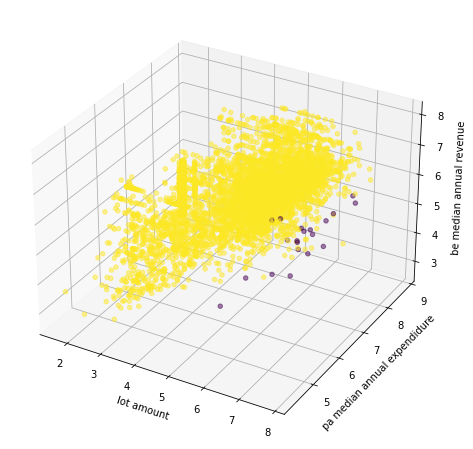

In [203]:
import numpy as np
import matplotlib as mpl
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
data = df[df["id_award_procedure"] == 1]
data["outlier"] = ~data["outlier"]

x = np.log10(data["amount"])
y = np.log10(data["pa_med_ann_expenditure"])
z = np.log10(data["be_med_ann_revenue"])
s = ax.scatter(x, y, z, c=data["outlier"], alpha=.5)
# legend = ax.legend(*s.legend_elements())
# ax.add_artist(legend) 

ax.set_xlabel("lot amount")
ax.set_ylabel("pa median annual expendidure")
ax.set_zlabel("be median annual revenue")
plt.show()

In [199]:
results = pd.read_csv("output/251022-155010_aperta_oc-svm/aperta_oc-svm.csv")


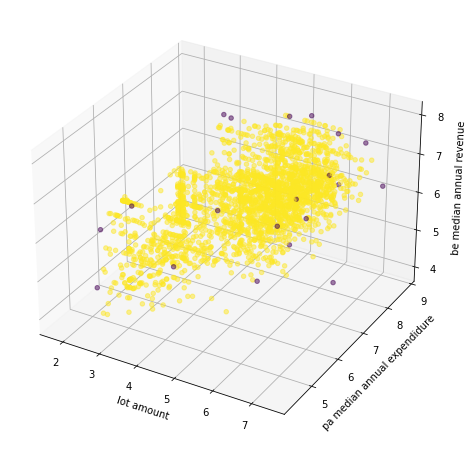

In [201]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
data = results

x = np.log10(data["amount"])
y = np.log10(data["pa_med_ann_expenditure"])
z = np.log10(data["be_med_ann_revenue"])
s = ax.scatter(x, y, z, c=data["score"], alpha=.5)
# legend = ax.legend(*s.legend_elements())
# ax.add_artist(legend) 

ax.set_xlabel("lot amount")
ax.set_ylabel("pa median annual expendidure")
ax.set_zlabel("be median annual revenue")
plt.show()

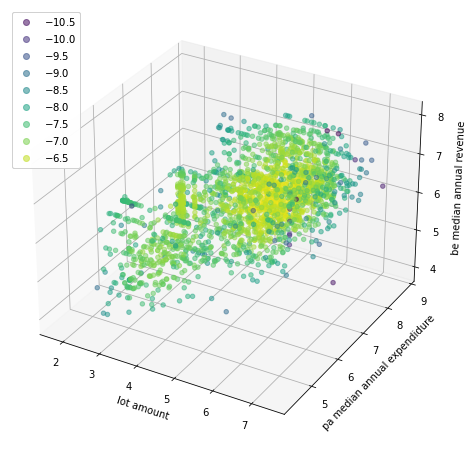

In [205]:
results = pd.read_csv("output/251022-155728_aperta_kde/aperta_kde.csv")
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
data = results

x = np.log10(data["amount"])
y = np.log10(data["pa_med_ann_expenditure"])
z = np.log10(data["be_med_ann_revenue"])
s = ax.scatter(x, y, z, c=data["score"], alpha=.5)
legend = ax.legend(*s.legend_elements())
ax.add_artist(legend) 

ax.set_xlabel("lot amount")
ax.set_ylabel("pa median annual expendidure")
ax.set_zlabel("be median annual revenue")
plt.show()